<a href="https://colab.research.google.com/github/adamecius/bojos_per_la_fisica_ICN2/blob/main/BojosPerLaFisica_Nanoelectronica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bojos per la Física

# **Práctica #0: Preparación**

Por favor, ejecute la celda de abajo pulsando el boton de play y espere el mensaje

> "All requested packages already installed."

Esto puede tardar un par de minutos

In [ ]:
%%bash
rm -Rf bojos_per_la_fisica_ICN2/ && git clone https://github.com/adamecius/bojos_per_la_fisica_ICN2.git&>log
mv bojos_per_la_fisica_ICN2/* .
bash install_kwant.sh

All requested packages already installed.


Lo que se hizo anteriormente fue inicializar el entorno de programación. Ahora vamos a habilitar las bibliotecas. Por favor, ejecute la celda de abajo pulsando el boton de play y espere el mensaje

> "Bibliotecas cargadas. ¡Bienvenidos!"



In [ ]:
import bojos
import kwant
import numpy as np
import matplotlib.pyplot as plt
from time import time
print(bojos.welcome)

Bibliotecas cargadas. ¡Bienvenidos!



# **Práctica #1: Resistencia de nanodispositivos**


El primer ejercicio consiste en la visualización de una cinta de grafeno y su comparación con lo que simulamos en ICN2.

**Ejecute la celda a continuación pulsando el boton de play.**

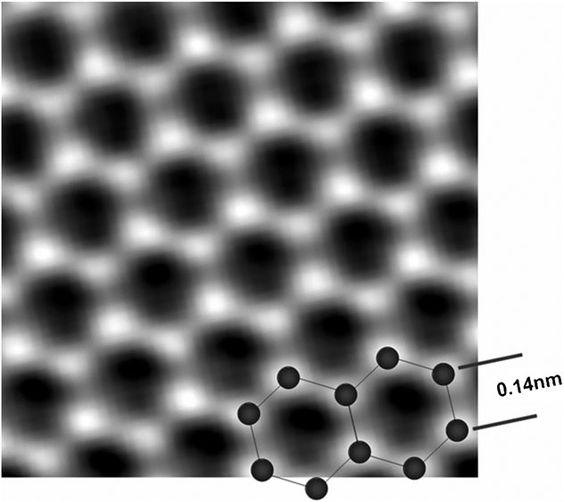

In [ ]:
bojos.ejemplo_grafeno_real()

El grafeno es un material compuesto únicamente por carbono, y su estructura cristalina es una red panal de abeja o honeycomb. 

En icn2, simulamos el grafeno como una cinta, con largo L y ancho W.  veamos como la simulamos en ICN2. A continuación, cambie los valores L y W y observe como cambia nuestro modelo

**Ejecute la celda a continuación pulsando el boton de play.**

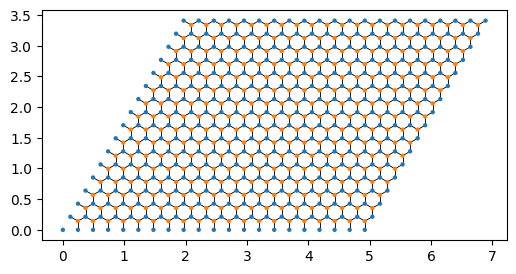

In [ ]:
L= 5        #Largo en nanometros 
W= 4        #Ancho en nanometros
grafeno = bojos.crear_cable(L,W);
bojos.graficar_sistema(grafeno);

Ya hemos visto como podemos simular una red de grafeno, pero para medirla. Lo que sigue es un ejemplo de un dispositivo de hecho de grafeno. Las barras encima son contactos por donde se aplica un voltaje. El grafeno sirve como un cable con una resistencia.

**Ejecute la celda a continuación pulsando el boton de play.**

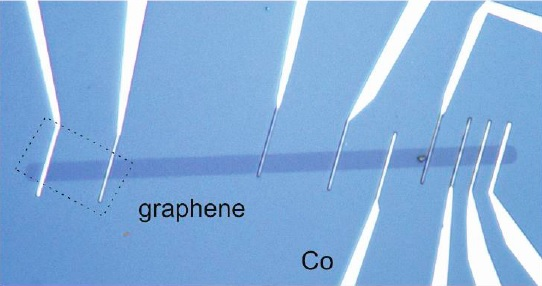

In [ ]:
bojos.ejemplo_dispositivo_grafeno()

En nuestro caso, usaremos como contacto el propio grafeno, y lo diferenciaremos del cable coloreandolo en rojo. 

**Ejecute la celda a continuación pulsando el boton de play.**

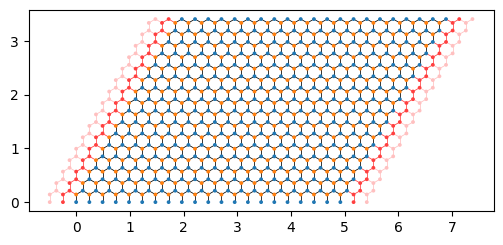

In [ ]:
L= 5        #Largo en nanometros 
W= 4        #Ancho en nanometros
grafeno = bojos.crear_cable(L,W);
grafeno = bojos.agregar_contactos(grafeno,L, W);
bojos.graficar_sistema(grafeno);

En el siguiente ejercicio vamos a evaluar la dependencia de la resistencia con la longitud de los dispositivos. Primero, vamos a discutir la siguiente preguntas:

1. ¿Como se relaciona la resistencia con la longitud y el ancho?
2. ¿Qué es la resistividad?
3. ¿De qué depende la resistividad?

A continuación agregaremos desorden modificando algunos átomos de la red. Modifique el parametro "concentracion_impurezas" 

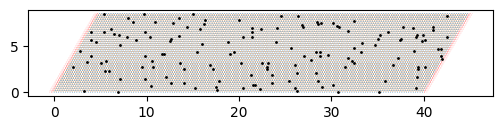

In [ ]:
L= 40        #Largo en nanometros 
W= 10        #Ancho en nanometros
concentracion_impurezas = 1 #concentración impurezas red en %
grafeno = bojos.crear_cable(L,W,c=concentracion_impurezas);
grafeno = bojos.agregar_contactos(grafeno,L, W);
bojos.graficar_sistema(grafeno);

Abajo haremos nuestras simulaciones cuánticas de resistencias para várias longitudes

**Ejecute la celda a continuación pulsando el boton de play.**

El calculo de la resistencia tardó
 57.49656057357788 segundos


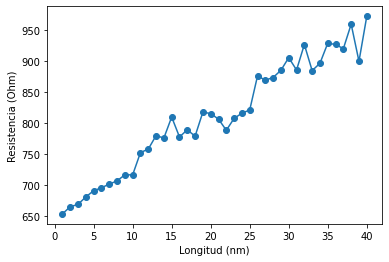

In [ ]:
num_medidas=1;
concentracion_impurezas = 30 #concentración impurezas red en %

Longitudes = np.linspace(1,40,40);
tot_time = time()
Resistencias=list();
for L in Longitudes:
  grafeno = bojos.crear_cable(L,W,c=concentracion_impurezas);
  grafeno = bojos.agregar_contactos(grafeno,L,W);
  Resistencias.append( bojos.calcula_resistencia(grafeno.finalized(),bojos.energy,num_medidas) );
elapsed_time = time() - tot_time
print("El calculo de la resistencia tardó\n",elapsed_time,"segundos")
 
plt.plot(Longitudes,Resistencias,"-o");
plt.xlabel("Longitud (nm)");
plt.ylabel("Resistencia (Ohm)");
#plt.ylim(0.1,0.15);

Ahora que tenemos los datos de la simulación cuántica, vamos a entenderlos. Primero, vamos a asumir que nuestra curva es ajustada por una recta, y determinemos sus valores.

**Ejecute la celda a continuación pulsando el boton de play.**


m L + b con m= 7.544336844856364  y b= 655.6942887041614


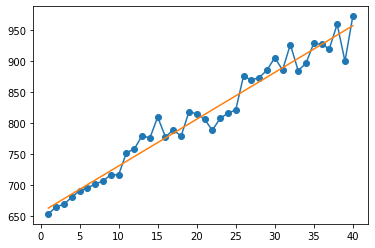

In [ ]:
m, b = np.polyfit(Longitudes, Resistencias, 1);
plt.plot(Longitudes,Resistencias,"-o");
plt.plot(Longitudes,m*Longitudes+b);
print("m L + b con m=",m," y b=",b)

Parece que ajusta bien, pero:
> ¿Qué ocurre en L=0?
Para determinarlo vamos a calcular en sistemas más pequeños

**Ejecute la celda a continuación pulsando el boton de play.**

El calculo de la resistencia tardó
 3.0558345317840576 segundos
m L + b con m= 7.595411504375721  y b= 655.7701150722165


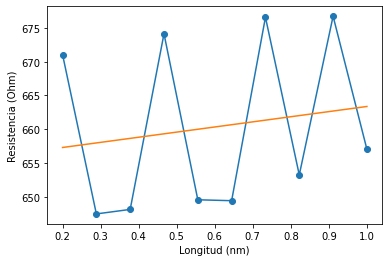

In [ ]:
num_medidas=1;
concentracion_impurezas = 30 #concentración impurezas red en %

Longitudes = np.linspace(0.2,1,10);
tot_time = time()
Resistencias=list();
for L in Longitudes:
  grafeno = bojos.crear_cable(L,W,c=concentracion_impurezas);
  grafeno = bojos.agregar_contactos(grafeno,L,W);
  Resistencias.append( bojos.calcula_resistencia(grafeno.finalized(),bojos.energy,num_medidas) );
elapsed_time = time() - tot_time
print("El calculo de la resistencia tardó\n",elapsed_time,"segundos")
 
plt.plot(Longitudes,Resistencias,"-o");
plt.xlabel("Longitud (nm)");
plt.ylabel("Resistencia (Ohm)");
#plt.ylim(0.1,0.15);

m, b = np.polyfit(Longitudes, Resistencias, 1);
plt.plot(Longitudes,m*Longitudes+b);
print("m L + b con m=",m," y b=",b)

# Discutamos ahora los resultados.

# **Práctica #2: Efecto Hall en nanodispositivos**


En la segunda parte de la práctica haremos una barra Hall. 

**Ejecute la celda a continuación pulsando el boton de play.**

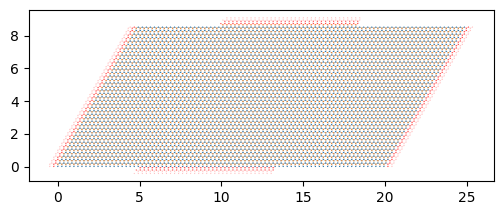

In [ ]:
L= 20        #Largo en nanometros 
W= 10        #Ancho en nanometros
grafeno = bojos.crear_cable(L,W);
grafeno = bojos.crear_barra_hall(grafeno,L, W);
bojos.graficar_sistema(grafeno);

Ahora calcularemos el voltaje Hall como función del campo magnetico. En el grafeno, podemos comprobar si se transporta electrones o huecos con el parametro energia (E0). 

**Ejecute la celda a continuación pulsando el boton de play.**

El calculo de la resistencia tardó
 19.62387704849243 segundos


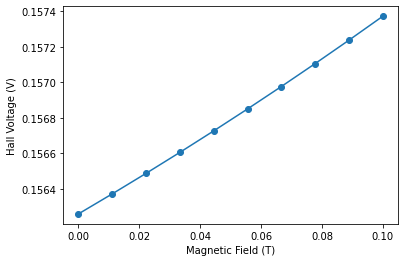

In [ ]:
concentracion_impurezas = 0 #concentración impurezas red en %
Bs = np.linspace(0,0.1,10);
E0 = 2;
tot_time = time()
VHalls=list();
I=(1e-3,-1e-3,0);
for B in Bs:
  grafeno = bojos.crear_cable(L,W,c=concentracion_impurezas,phi=B*bojos.Area);
  grafeno = bojos.crear_barra_hall(grafeno,L,W);
  Rs= bojos.calcula_matriz_resistencia(grafeno.finalized(),E0=E0 );
  V = Rs.dot(I) # Ley de Ohm
  Vh = V[2]; Vr = V[0]-V[1];
  VHalls.append(Vh);
elapsed_time = time() - tot_time
print("El calculo de la resistencia tardó\n",elapsed_time,"segundos")
  
plt.plot(Bs,VHalls,"-o");
plt.xlabel("Magnetic Field (T)");
plt.ylabel("Hall Voltage (V)");
#plt.ylim(0.1,0.15);

Ahora bien ¿Qué ocurre al ir a campos mayores? ¡Averiguemoslo!

**Ejecute la celda a continuación pulsando el boton de play.**


El calculo de la resistencia tardó
 80.33554720878601 segundos


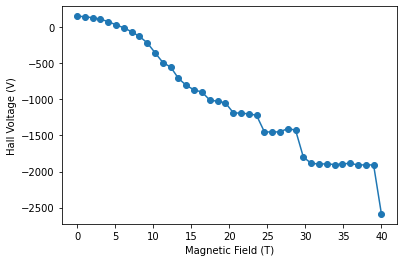

In [ ]:
concentracion_impurezas = 0 #concentración impurezas red en %
Bs = np.linspace(0,40,40);
E0 = -2;
tot_time = time()
VHalls=list();
I=(1,-1,0);
for B in Bs:
  grafeno = bojos.crear_cable(L,W,c=concentracion_impurezas,phi=B*bojos.Area);
  grafeno = bojos.crear_barra_hall(grafeno,L,W);
  Rs= bojos.calcula_matriz_resistencia(grafeno.finalized(),E0=E0 );
  V = Rs.dot(I) # Ley de Ohm
  Vh = V[2]; Vr = V[0]-V[1];
  VHalls.append(Vh);
elapsed_time = time() - tot_time
print("El calculo de la resistencia tardó\n",elapsed_time,"segundos")
  
plt.plot(Bs,VHalls,"-o");
plt.xlabel("Magnetic Field (T)");
plt.ylabel("Hall Voltage (V)");
#plt.ylim(0.1,0.15);